## Import and clean the data

In [2]:
import pandas as pd

ruta = r"wildfires\data.csv"

df = pd.read_csv(ruta)

# Mostrar primeras filas
df.head()


C:\Users\E R K PRADEEP\AppData\Local\Temp\ipykernel_22936\654052743.py:5: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

In [5]:
df.isna().sum()

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

there are many columns with few information, but they are not important in our analysis, we are going to make a subset with  the next variables :  "FIRE_YEAR",
    "DISCOVERY_DATE",
    "DISCOVERY_DOY",
    "NWCG_CAUSE_CLASSIFICATION",
    "NWCG_GENERAL_CAUSE",
    "LATITUDE",
    "LONGITUDE",
    "FIRE_SIZE", 
    "FIRE_SIZE_CLASS",  "OWNER_DESCR",
    "STATE"

In [6]:
cols = [
    "FIRE_YEAR",
    "DISCOVERY_DATE",
    "DISCOVERY_DOY",
    "NWCG_CAUSE_CLASSIFICATION",
    "NWCG_GENERAL_CAUSE",
    "LATITUDE",
    "LONGITUDE",
    "FIRE_SIZE",
    "OWNER_DESCR",
    "FIRE_SIZE_CLASS",
    "STATE"
]

df_clean = df[cols].copy()

# Eliminar filas con NA en estas columnas clave
df_clean = df_clean.dropna(subset=cols)

# Mostrar info
df_clean.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,FIRE_SIZE,OWNER_DESCR,FIRE_SIZE_CLASS,STATE
0,2005,2/2/2005,33,Human,Power generation/transmission/distribution,40.036944,-121.005833,0.10,USFS,A,CA
1,2004,5/12/2004,133,Natural,Natural,38.933056,-120.404444,0.25,USFS,A,CA
2,2004,5/31/2004,152,Human,Debris and open burning,38.984167,-120.735556,0.10,STATE OR PRIVATE,A,CA
3,2004,6/28/2004,180,Natural,Natural,38.559167,-119.913333,0.10,USFS,A,CA
4,2004,6/28/2004,180,Natural,Natural,38.559167,-119.933056,0.10,USFS,A,CA


In order to remove noise, we will only considerf in our analysis the fires greater than 100 acres (Fire class D,E,F and G)

In [7]:
df_big = df_clean[df_clean["FIRE_SIZE"] > 100].copy()

In [8]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60713 entries, 16 to 2303565
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIRE_YEAR                  60713 non-null  int64  
 1   DISCOVERY_DATE             60713 non-null  object 
 2   DISCOVERY_DOY              60713 non-null  int64  
 3   NWCG_CAUSE_CLASSIFICATION  60713 non-null  object 
 4   NWCG_GENERAL_CAUSE         60713 non-null  object 
 5   LATITUDE                   60713 non-null  float64
 6   LONGITUDE                  60713 non-null  float64
 7   FIRE_SIZE                  60713 non-null  float64
 8   OWNER_DESCR                60713 non-null  object 
 9   FIRE_SIZE_CLASS            60713 non-null  object 
 10  STATE                      60713 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 5.6+ MB


In [9]:
df_big.to_csv("wildfires_greather_than_100acres.csv", index=False)


##  the next step is to add the weather:
This step take a long time since we are conecting to a web server for getting the weather data. You can split this step and continue the code with the output data fron this step ( wildfires_greather_than_100acres_with_temperature.csv)

In [11]:

import requests
from tqdm import tqdm

# 1.convert date to the format YYYY-MM-DD
df_big["DATE"] = pd.to_datetime(df_big["DISCOVERY_DATE"]).dt.strftime("%Y-%m-%d")

# 2. Create dataframe unique 
unique_requests = df_big[["LATITUDE", "LONGITUDE", "DATE"]].drop_duplicates()

# 3. Function to get Tmax from  Open-Meteo
def get_tmax(lat, lon, date):
    url = (
        "https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}"
        f"&start_date={date}&end_date={date}"
        "&daily=temperature_2m_max&timezone=UTC"
    )
    try:
        response = requests.get(url)
        data = response.json()
        return data["daily"]["temperature_2m_max"][0]
    except:
        return None

# 4. get Tmax for each combination
tmax_list = []
for _, row in tqdm(unique_requests.iterrows(), total=len(unique_requests)):
    tmax = get_tmax(row["LATITUDE"], row["LONGITUDE"], row["DATE"])
    tmax_list.append(tmax)

unique_requests["TMAX"] = tmax_list

# 5. Hacer merge de vuelta al dataset grande
df_big = df_big.merge(unique_requests, on=["LATITUDE", "LONGITUDE", "DATE"], how="left")

# 6. Verificar
df_big[["LATITUDE", "LONGITUDE", "DATE", "TMAX"]].head()


100%|█████████████████████████████████████████████████████████████████████████| 60604/60604 [14:07:45<00:00,  1.19it/s]


,LATITUDE,LONGITUDE,DATE,TMAX
0,38.523333,-120.211667,2004-10-06,21.3
1,38.780000,-120.260000,2004-10-13,24.7
2,36.001667,-81.590000,2005-02-12,10.5
3,43.899167,-102.954722,2005-07-16,40.1
4,43.892778,-102.948056,2005-07-16,39.7


In [13]:
df_big.to_csv("wildfires_greather_than_100acres_with_temperature.csv", index=False)

## Exploratory Analysis


In [13]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('wildfires_greather_than_100acres_with_temperature.xls')

# Mostrar primeras filas
df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,FIRE_SIZE,OWNER_DESCR,FIRE_SIZE_CLASS,STATE,DATE,TMAX
0,2004,10/6/2004,280,Human,Equipment and vehicle use,38.523333,-120.211667,16823.0,USFS,G,CA,2004-10-06,21.3
1,2004,10/13/2004,287,Human,Power generation/transmission/distribution,38.780000,-120.260000,7700.0,USFS,G,CA,2004-10-13,24.7
2,2005,2/12/2005,43,Human,Debris and open burning,36.001667,-81.590000,125.0,MISSING/NOT SPECIFIED,D,NC,2005-02-12,10.5
3,2005,7/16/2005,197,Natural,Natural,43.899167,-102.954722,119.0,USFS,D,SD,2005-07-16,40.1
4,2005,7/16/2005,197,Natural,Natural,43.892778,-102.948056,119.0,USFS,D,SD,2005-07-16,39.7


In [14]:
df.describe()

,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,FIRE_SIZE,TMAX
count,60713.000000,60713.000000,60713.000000,60713.000000,60713.000000,12822.000000
mean,2006.523282,171.324082,38.172772,-103.085502,2795.894464,26.413235
std,7.887377,83.419660,7.632492,16.506598,15969.315245,7.567415
min,1992.000000,1.000000,17.950000,-178.802600,100.030000,-10.100000
25%,2000.000000,97.000000,33.463417,-114.408600,162.000000,21.600000
50%,2007.000000,181.000000,36.710300,-101.324200,300.000000,27.200000
75%,2013.000000,227.000000,42.518350,-92.483330,900.000000,32.100000
max,2020.000000,366.000000,70.138100,-65.325278,662700.000000,46.200000


In [15]:
# Agrupa por 'Categoría' y calcula el promedio de 'Valor'
AVerage_number_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

print(AVerage_number_by_year)

FIRE_YEAR
1992    1388.019397
1993    1425.571104
1994    1686.482044
1995    1061.029662
1996    2432.382025
1997    2828.955220
1998    1170.406307
1999    2413.891493
2000    2461.126523
2001    1637.704620
2002    3860.176911
2003    2537.057293
2004    6206.472430
2005    3634.453028
2006    2376.228434
2007    3463.893800
2008    1769.161713
2009    2543.809368
2010    1559.287322
2011    2643.774917
2012    3885.477504
2013    3516.418040
2014    2310.901166
2015    4581.262209
2016    2131.845403
2017    3905.515353
2018    3744.838061
2019    3143.415467
2020    5195.396338
Name: FIRE_SIZE, dtype: float64


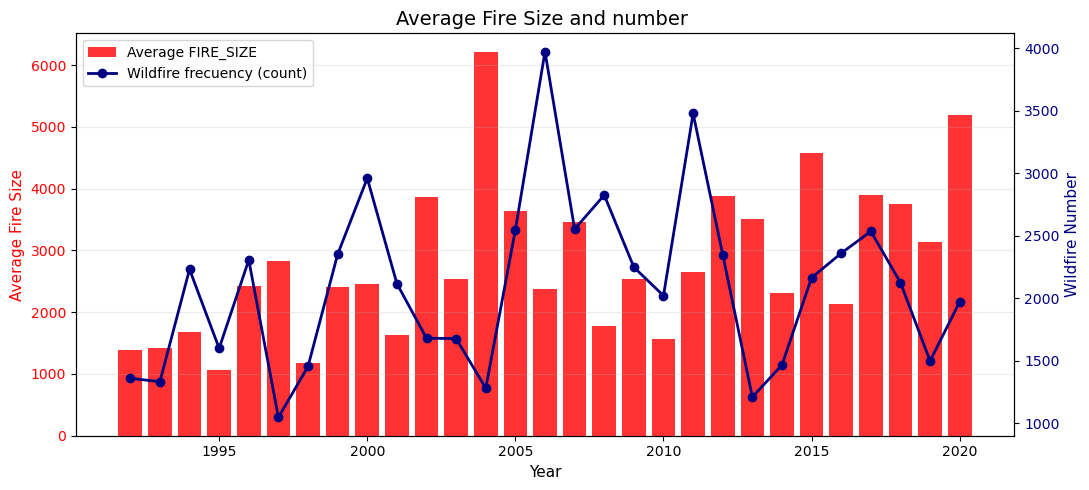

In [16]:
# --- Agregate

avg_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

# Anual Count
count_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].size()  # o .count(), equivalentes aquí

# make sure all data is by year 
years = sorted(set(avg_by_year.index).union(count_by_year.index))
avg_by_year = avg_by_year.reindex(years)
count_by_year = count_by_year.reindex(years)



fig, ax1 = plt.subplots(figsize=(11, 5))

# Bars: Aberage FIRE_SIZE
bars = ax1.bar(years, avg_by_year.values, color='red', alpha=0.8, label='Average FIRE_SIZE')
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Average Fire Size', color='red', fontsize=11)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('Average Fire Size and number ', fontsize=14)
ax1.grid(axis='y', alpha=0.25)
ax2 = ax1.twinx()
line = ax2.plot(years, count_by_year.values, color='navy', marker='o', linewidth=2, label='Wildfire frecuency (count)')
ax2.set_ylabel('Wildfire Number', color='navy', fontsize=11)
ax2.tick_params(axis='y', labelcolor='navy')

# --- Legend
lines = [bars, line[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
# Agrupa por 'Categoría' y calcula el promedio de 'Valor'
AVerage_number_by_year = df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

print(AVerage_number_by_year)

FIRE_YEAR
1992    1388.019397
1993    1425.571104
1994    1686.482044
1995    1061.029662
1996    2432.382025
1997    2828.955220
1998    1170.406307
1999    2413.891493
2000    2461.126523
2001    1637.704620
2002    3860.176911
2003    2537.057293
2004    6206.472430
2005    3634.453028
2006    2376.228434
2007    3463.893800
2008    1769.161713
2009    2543.809368
2010    1559.287322
2011    2643.774917
2012    3885.477504
2013    3516.418040
2014    2310.901166
2015    4581.262209
2016    2131.845403
2017    3905.515353
2018    3744.838061
2019    3143.415467
2020    5195.396338
Name: FIRE_SIZE, dtype: float64


In [18]:
df.columns = [c.strip().upper() for c in df.columns]
 # Fechas: DISCOVERY_DATE (m/d/Y) y DATE (YYYY-MM-DD)
if "DISCOVERY_DATE" in df.columns:
        df["DISCOVERY_DATE"] = pd.to_datetime(df["DISCOVERY_DATE"], errors="coerce", format="%m/%d/%Y")
if "DATE" in df.columns:
        df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce", format="%Y-%m-%d")

    # Usa DATE si existe, si no DISCOVERY_DATE
if "DATE" in df.columns:
        df["EVENT_DATE"] = df["DATE"]
elif "DISCOVERY_DATE" in df.columns:
        df["EVENT_DATE"] = df["DISCOVERY_DATE"]
else:
        raise ValueError("No se encontraron columnas de fecha ('DATE' o 'DISCOVERY_DATE').")

# Tipificar otras columnas
cat_cols = [
        "NWCG_CAUSE_CLASSIFICATION",
        "NWCG_GENERAL_CAUSE",
        "OWNER_DESCR",
        "FIRE_SIZE_CLASS",
        "STATE"
    ]
for c in cat_cols:
        if c in df.columns:
            df[c] = df[c].astype("category")

    # Numéricos
for num in ["LATITUDE", "LONGITUDE", "FIRE_SIZE", "TMAX", "DISCOVERY_DOY", "FIRE_YEAR"]:
        if num in df.columns:
            df[num] = pd.to_numeric(df[num], errors="coerce")


In [19]:
# Time Features
dt = df["DISCOVERY_DATE"]  
df["YEAR"] = dt.dt.year
df["MONTH"] = dt.dt.month
df["DOY"] = dt.dt.dayofyear
df["WEEKDAY"] = dt.dt.weekday  # 0=Lunes

month_to_season = {12: "Winter", 1: "Winter", 2: "Winter",
                       3: "Spring", 4: "Spring", 5: "Spring",
                       6: "Summer", 7: "Summer", 8: "Summer",
                       9: "Fall", 10: "Fall", 11: "Fall"}
df["SEASON"] = df["MONTH"].map(month_to_season).astype("category")

df.head()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,LATITUDE,LONGITUDE,FIRE_SIZE,OWNER_DESCR,FIRE_SIZE_CLASS,STATE,DATE,TMAX,EVENT_DATE,YEAR,MONTH,DOY,WEEKDAY,SEASON
0,2004,2004-10-06,280,Human,Equipment and vehicle use,38.523333,-120.211667,16823.0,USFS,G,CA,2004-10-06,21.3,2004-10-06,2004,10,280,2,Fall
1,2004,2004-10-13,287,Human,Power generation/transmission/distribution,38.780000,-120.260000,7700.0,USFS,G,CA,2004-10-13,24.7,2004-10-13,2004,10,287,2,Fall
2,2005,2005-02-12,43,Human,Debris and open burning,36.001667,-81.590000,125.0,MISSING/NOT SPECIFIED,D,NC,2005-02-12,10.5,2005-02-12,2005,2,43,5,Winter
3,2005,2005-07-16,197,Natural,Natural,43.899167,-102.954722,119.0,USFS,D,SD,2005-07-16,40.1,2005-07-16,2005,7,197,5,Summer
4,2005,2005-07-16,197,Natural,Natural,43.892778,-102.948056,119.0,USFS,D,SD,2005-07-16,39.7,2005-07-16,2005,7,197,5,Summer


In [20]:
# quality_checks(df):
print("\n=== Visión general ===")
print("Filas, columnas:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))


=== Visión general ===
Filas, columnas: (60713, 19)

Tipos de datos:
FIRE_YEAR                             int64
DISCOVERY_DATE               datetime64[ns]
DISCOVERY_DOY                         int64
NWCG_CAUSE_CLASSIFICATION          category
NWCG_GENERAL_CAUSE                 category
LATITUDE                            float64
LONGITUDE                           float64
FIRE_SIZE                           float64
OWNER_DESCR                        category
FIRE_SIZE_CLASS                    category
STATE                              category
DATE                         datetime64[ns]
TMAX                                float64
EVENT_DATE                   datetime64[ns]
YEAR                                  int32
MONTH                                 int32
DOY                                   int32
WEEKDAY                               int32
SEASON                             category
dtype: object

Valores faltantes (top 20):
TMAX                         47891
FIRE_YEAR       

In [21]:
# Rangos plausibles
if "LATITUDE" in df.columns and "LONGITUDE" in df.columns:
    invalid_lat = df[(df["LATITUDE"] < -90) | (df["LATITUDE"] > 90)].shape[0]
    invalid_lon = df[(df["LONGITUDE"] < -180) | (df["LONGITUDE"] > 180)].shape[0]
print(f"\nLatitud out of range {invalid_lat}")
print(f"Longitud out os range {invalid_lon}")


Latitud out of range 0
Longitud out os range 0


In [22]:
if "TMAX" in df.columns:
    tmin, tmax = df["TMAX"].min(skipna=True), df["TMAX"].max(skipna=True)
print(f"\nRange TMAX: [{tmin:.2f}, {tmax:.2f}] (°C expected ~[-30, 60])")


Range TMAX: [-10.10, 46.20] (°C expected ~[-30, 60])


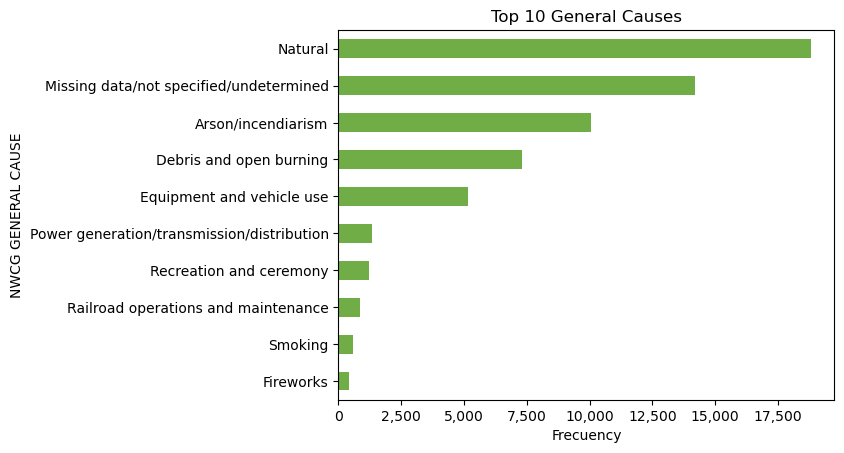

In [23]:
# plot_top_categories(df, col, outdir, top=15, title=None):
vc = df["NWCG_GENERAL_CAUSE"].astype(str).value_counts().head(10)[::-1]
ax = vc.plot(kind="barh", color="#70AD47")
plt.title("Top 10 General Causes")
plt.xlabel("Frecuency")
plt.ylabel("NWCG GENERAL CAUSE")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
   # savefig_tight(os.path.join(outdir, f"02_top_{col.lower()}.png"))
plt.show()

In [24]:
monthly = df.groupby("MONTH").size()

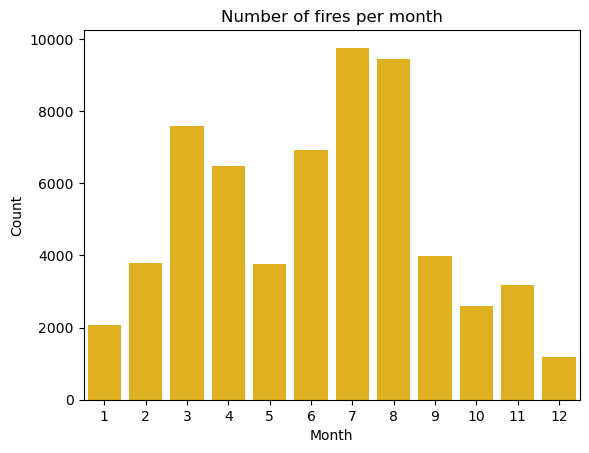

In [25]:
sns.barplot(x=monthly.index, y=monthly.values, color="#FFC000")
plt.title("Number of fires per month")
plt.xlabel("Month")
plt.ylabel("Count")
# savefig_tight(os.path.join(outdir, "08_incendios_por_mes.png"))
plt.show()

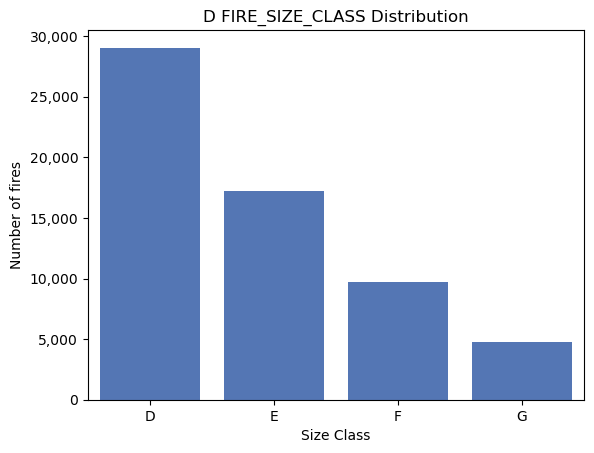

In [26]:
# plot_class_distribution(df, outdir):

counts = df["FIRE_SIZE_CLASS"].value_counts().sort_index()
ax = sns.barplot(x=counts.index.astype(str), y=counts.values, color="#4472C4")
plt.title("D FIRE_SIZE_CLASS Distribution")
plt.xlabel("Size Class")
plt.ylabel("Number of fires")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
# savefig_tight(os.path.join(outdir, "01_fire_size_class.png"))
plt.show()

## Ridge, Lasso and Elastics regression

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
year_col   = "FIRE_YEAR"      # year of fire
target_col = "FIRE_SIZE"      # burned area

feature_cols = [
    "LATITUDE",
    "LONGITUDE",
    "DISCOVERY_DOY",  # day of year (numeric)
    "TMAX",           # max temperature
]

In [29]:
df_model = df[[year_col, target_col] + feature_cols].dropna()
df_model

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,DISCOVERY_DOY,TMAX
0,2004,16823.0,38.523333,-120.211667,280,21.3
1,2004,7700.0,38.780000,-120.260000,287,24.7
2,2005,125.0,36.001667,-81.590000,43,10.5
3,2005,119.0,43.899167,-102.954722,197,40.1
4,2005,119.0,43.892778,-102.948056,197,39.7
...,...,...,...,...,...,...
60708,2019,9668.0,44.285050,-118.459800,221,20.4
60709,2020,401.0,36.303830,-94.903820,61,17.4
60710,2020,1000.0,26.191111,-81.523889,134,33.3
60711,2020,24892.0,46.670340,-120.114500,230,34.4


## Outer temporal split:

In [30]:

#    Train = 1992–2015, Test = 2016–2020
train_mask = (df_model[year_col] >= 1992) & (df_model[year_col] <= 2015)
test_mask  = (df_model[year_col] >= 2016) & (df_model[year_col] <= 2020)

train_df = df_model.loc[train_mask].copy()
test_df  = df_model.loc[test_mask].copy()

X_train = train_df[feature_cols].values
y_train = train_df[target_col].values

X_test = test_df[feature_cols].values
y_test = test_df[target_col].values

## Spatiotemporal BLOCKED CV on TRAINING data

In [31]:

#    - Region block: north vs south (latitude)
#    - Time block: early / mid / late within 1992–2015
#    - Each fold holds out one region-time block (LOGO)

# Spatial blocking: north (1) vs south (0)
lat_median = train_df["LATITUDE"].median()
train_df["region_block"] = np.where(train_df["LATITUDE"] >= lat_median, 1, 0)

# Temporal blocking: split training years into ~3 consecutive bins
# (early / mid / late 1992–2015)
train_df["time_block"] = pd.qcut(
    train_df[year_col],
    q=3,
    labels=False,
    duplicates="drop"
)

# Spatiotemporal block ID = combination of region and time block
train_df["block_id"] = (
    train_df["region_block"].astype(int) * 10
    + train_df["time_block"].astype(int)
)

groups = train_df["block_id"].values

logo = LeaveOneGroupOut()

print("Training samples:", X_train.shape[0])
print("Test samples:    ", X_test.shape[0])
print("Latitude median for north/south split:", lat_median)
print("Unique spatiotemporal blocks (train):", np.unique(groups))

Training samples: 10447
Test samples:     2375
Latitude median for north/south split: 38.83666667
Unique spatiotemporal blocks (train): [ 0  1  2 10 11 12]


## Ridge Regression with blocked CV (LOGO)

In [32]:

ridge_alphas = np.logspace(-3, 3, 10)  # 0.001 → 1000

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

ridge_param_grid = {
    "ridge__alpha": ridge_alphas
}

ridge_grid = GridSearchCV(
    ridge_pipe,
    param_grid=ridge_param_grid,
    cv=logo,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train, groups=groups)

ridge_best = ridge_grid.best_estimator_
print("\n=== Ridge Regression ===")
print("Best alpha:", ridge_grid.best_params_["ridge__alpha"])

y_pred_ridge = ridge_best.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("Test RMSE:", ridge_rmse)
print("Test R^2 :", ridge_r2)


=== Ridge Regression ===
Best alpha: 1000.0
Test RMSE: 27710.156994977537
Test R^2 : -0.002482854884416019


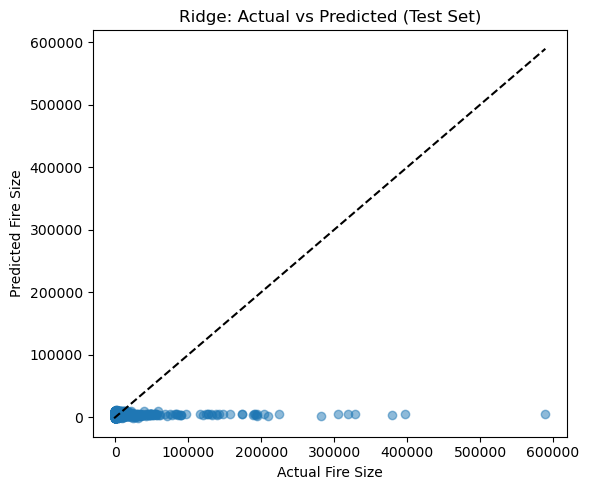

In [33]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
min_val = min(y_test.min(), y_pred_ridge.min())
max_val = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.xlabel("Actual Fire Size")
plt.ylabel("Predicted Fire Size")
plt.title("Ridge: Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

## LASSO Regression with blocked CV (LOGO)

In [34]:
lasso_alphas = np.logspace(-3, 1, 10)  # 0.001 → 10

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(max_iter=10000))
])

lasso_param_grid = {
    "lasso__alpha": lasso_alphas
}

lasso_grid = GridSearchCV(
    lasso_pipe,
    param_grid=lasso_param_grid,
    cv=logo,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train, groups=groups)

lasso_best = lasso_grid.best_estimator_
print("\n=== LASSO Regression ===")
print("Best alpha:", lasso_grid.best_params_["lasso__alpha"])

y_pred_lasso = lasso_best.predict(X_test)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("Test RMSE:", lasso_rmse)
print("Test R^2 :", lasso_r2)


=== LASSO Regression ===
Best alpha: 10.0
Test RMSE: 27710.99704131568
Test R^2 : -0.0025436372766818316


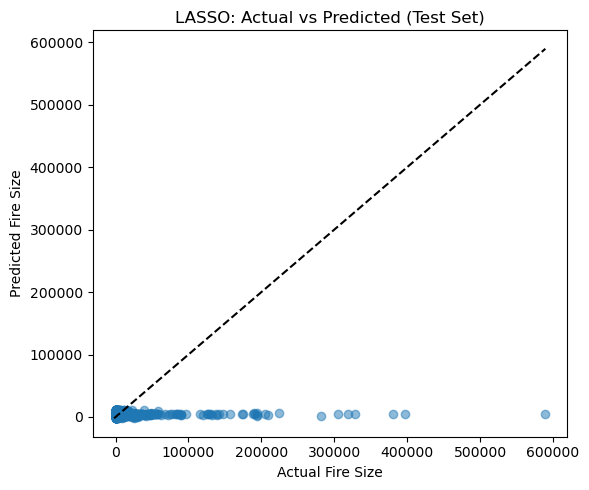

In [35]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
min_val = min(y_test.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.xlabel("Actual Fire Size")
plt.ylabel("Predicted Fire Size")
plt.title("LASSO: Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

## Elastic Net Regression  blocked CV (LOGO)

In [36]:
elastic_alphas = np.logspace(-3, 1, 8)  # 0.001 → 10
elastic_l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

elastic_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(max_iter=10000))
])

elastic_param_grid = {
    "elastic__alpha": elastic_alphas,
    "elastic__l1_ratio": elastic_l1_ratios
}

elastic_grid = GridSearchCV(
    elastic_pipe,
    param_grid=elastic_param_grid,
    cv=logo,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

elastic_grid.fit(X_train, y_train, groups=groups)

elastic_best = elastic_grid.best_estimator_
print("\n=== Elastic Net Regression ===")
print("Best alpha   :", elastic_grid.best_params_["elastic__alpha"])
print("Best l1_ratio:", elastic_grid.best_params_["elastic__l1_ratio"])

y_pred_elastic = elastic_best.predict(X_test)
elastic_rmse = mean_squared_error(y_test, y_pred_elastic, squared=False)
elastic_r2 = r2_score(y_test, y_pred_elastic)
print("Test RMSE:", elastic_rmse)
print("Test R^2 :", elastic_r2)


=== Elastic Net Regression ===
Best alpha   : 0.7196856730011514
Best l1_ratio: 0.3
Test RMSE: 27713.39270172146
Test R^2 : -0.0027169877996575664


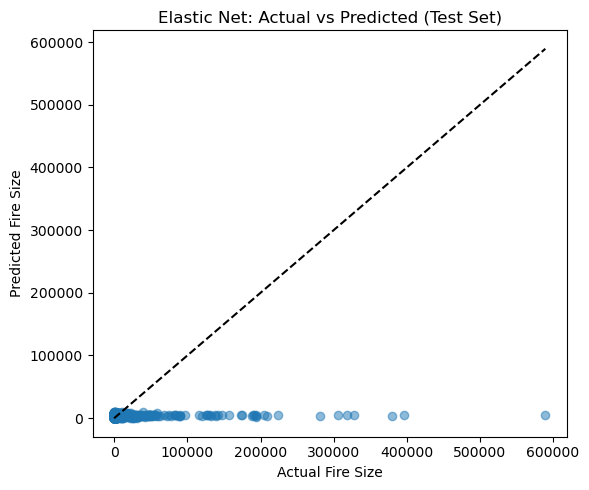

In [37]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_elastic, alpha=0.5)
min_val = min(y_test.min(), y_pred_elastic.min())
max_val = max(y_test.max(), y_pred_elastic.max())
plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.xlabel("Actual Fire Size")
plt.ylabel("Predicted Fire Size")
plt.title("Elastic Net: Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

## Multinomial Logistic Regression for Wildfire cause "NWCG_CAUSE_CLASSIFICATION"

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight
# For nicer printing
pd.set_option("display.max_columns", 50)

In [39]:
#Define Target and predictor columns
df = df.dropna().copy()
# Define target and predictors
year_col   = "FIRE_YEAR"      # year of fire
target_col = "NWCG_CAUSE_CLASSIFICATION"      # Class of Cause

feature_cols = [
    "LATITUDE",
    "LONGITUDE",
    "DISCOVERY_DOY",  # day of year (numeric)
    "TMAX",           # max temperature
]
train_mask = (df[year_col] >= 1992) & (df[year_col] <= 2015)
test_mask  = (df[year_col] >= 2016) & (df[year_col] <= 2020)
train_df = df.loc[train_mask].copy()
test_df  = df.loc[test_mask].copy()

In [40]:
all_cols = train_df.columns.tolist()

# Heuristic: treat numeric vs object
numeric_cols = train_df[all_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_df[all_cols].select_dtypes(include=["object", "category"]).columns.tolist()

# Remove geographic/time columns from categorical if you prefer numeric
# For example latitude/longitude are numeric already; ensure they are included
print("Numeric predictors:", numeric_cols)
print("Categorical predictors:", cat_cols)
predictor_cols = numeric_cols + cat_cols

Numeric predictors: ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'TMAX', 'YEAR', 'MONTH', 'DOY', 'WEEKDAY']
Categorical predictors: ['NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'OWNER_DESCR', 'FIRE_SIZE_CLASS', 'STATE', 'SEASON']


In [41]:
# Train = 1992–2015, Test = 2016–2020
train_df = df.loc[(df[year_col] >= 1992) & (df[year_col] <= 2015)].copy()
test_df  = df.loc[(df[year_col] >= 2016) & (df[year_col] <= 2020)].copy()

X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_test  = test_df[feature_cols]
y_test  = test_df[target_col]

print("Train shape:", train_df.shape)
print("Test  shape:", test_df.shape)

Train shape: (10447, 19)
Test  shape: (2375, 19)


In [43]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

In [44]:
logreg = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    max_iter=5000,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("preproc", preprocessor),
    ("clf", logreg)
])

# Hyperparameter search
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l2"],
}

gs = GridSearchCV(
    pipe,
    param_grid,
    scoring="accuracy",
    cv=5,              # ← simple k-fold
    n_jobs=-1,
    verbose=1
)

# Fit model
gs.fit(X_train, y_train)

print("Best parameters:", gs.best_params_)
print("Best CV score:", gs.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'clf__C': 10, 'clf__penalty': 'l2'}
Best CV score: 0.6782820928032689


In [45]:
best_model = gs.best_estimator_

# Fit best model on full training set (GridSearchCV already refits by default)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)  # shape (n_samples, n_classes)

# Basic metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps["clf"].classes_)

print("\nTest accuracy:", acc)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))


Test accuracy: 0.5574736842105263

Confusion matrix:
 [[746   0 429]
 [ 79   1 135]
 [408   0 577]]

Classification report:
                                          precision    recall  f1-score   support

                                  Human       0.61      0.63      0.62      1175
Missing data/not specified/undetermined       1.00      0.00      0.01       215
                                Natural       0.51      0.59      0.54       985

                               accuracy                           0.56      2375
                              macro avg       0.70      0.41      0.39      2375
                           weighted avg       0.60      0.56      0.53      2375



In [46]:
# Binarize labels to compute ROC AUC in a one-vs-rest fashion
le = LabelEncoder()
le.fit(np.concatenate([y_train, y_test]))
y_test_enc = le.transform(y_test)
classes = le.classes_
y_test_bin = label_binarize(y_test_enc, classes=np.arange(len(classes)))

# predict_proba order matches classifier classes; map them to label-encoder order
# the gs pipeline's classifier classes_ may be in different order; we need to reorder columns
clf_classes = best_model.named_steps["clf"].classes_
# map column indices: clf_classes -> index in le.classes_
col_order = [np.where(classes == c)[0][0] for c in clf_classes]
# reorder y_proba columns to match label_binarize ordering
y_proba_reordered = np.zeros_like(y_proba)
for i, col_idx in enumerate(col_order):
    y_proba_reordered[:, col_idx] = y_proba[:, i]

# Compute per-class ROC AUC (OvR)
per_class_auc = {}
for i, cls in enumerate(classes):
    try:
        auc = roc_auc_score(y_test_bin[:, i], y_proba_reordered[:, i])
    except ValueError:
        auc = np.nan
    per_class_auc[cls] = auc

# Macro and weighted AUC (sklearn supports multi_class='ovr' with label-binarized arrays)
try:
    macro_auc = roc_auc_score(y_test_bin, y_proba_reordered, average="macro", multi_class="ovo")
    weighted_auc = roc_auc_score(y_test_bin, y_proba_reordered, average="weighted", multi_class="ovo")
except Exception:
    macro_auc = np.nan
    weighted_auc = np.nan

print("\nPer-class ROC-AUC (OvR):")
for cls, a in per_class_auc.items():
    print(f"  {cls}: {a:.3f}")

print(f"\nMacro AUC (ovo): {macro_auc:.3f}")
print(f"Weighted AUC (ovo): {weighted_auc:.3f}")


Per-class ROC-AUC (OvR):
  Human: 0.678
  Missing data/not specified/undetermined: 0.609
  Natural: 0.653

Macro AUC (ovo): 0.647
Weighted AUC (ovo): 0.661


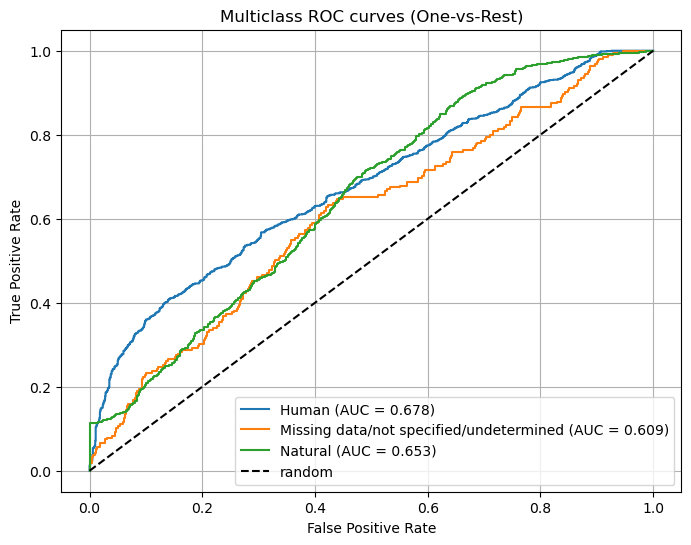

In [47]:
plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    if np.isnan(per_class_auc[cls]):
        continue
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_reordered[:, i])
    plt.plot(fpr, tpr, label=f"{cls} (AUC = {per_class_auc[cls]:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC curves (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Tree-Based Models for Wildfire Burned Area (FIRE_SIZE)

In [48]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [50]:
# df = pd.read_csv("wildfires_greather_than_100acres_with_temperature.xls")

# Define target and predictors
year_col   = "FIRE_YEAR"      # year of fire
target_col = "FIRE_SIZE"      # burned area (acres)

feature_cols = [
    "LATITUDE",
    "LONGITUDE",
    "DISCOVERY_DOY",  # day of year (numeric)
    "TMAX",           # max temperature
]

# Keep only rows with complete data in these columns
df_model = df[[year_col, target_col] + feature_cols].dropna().copy()

print("Shape after dropna:", df_model.shape)
df_model.head()


Shape after dropna: (12822, 6)


,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,DISCOVERY_DOY,TMAX
0,2004,16823.0,38.523333,-120.211667,280,21.3
1,2004,7700.0,38.780000,-120.260000,287,24.7
2,2005,125.0,36.001667,-81.590000,43,10.5
3,2005,119.0,43.899167,-102.954722,197,40.1
4,2005,119.0,43.892778,-102.948056,197,39.7


In [51]:
# Train = 1992–2015, Test = 2016–2020
train_mask = (df_model[year_col] >= 1992) & (df_model[year_col] <= 2015)
test_mask  = (df_model[year_col] >= 2016) & (df_model[year_col] <= 2020)

train_df = df_model.loc[train_mask].copy()
test_df  = df_model.loc[test_mask].copy()

X_train = train_df[feature_cols].values
y_train = train_df[target_col].values

X_test = test_df[feature_cols].values
y_test = test_df[target_col].values

print("Train shape:", train_df.shape)
print("Test  shape:", test_df.shape)

Train shape: (10447, 6)
Test  shape: (2375, 6)


In [52]:
###median = train_df["LATITUDE"].median()
train_df["region_block"] = np.where(train_df["LATITUDE"] >= lat_median, 1, 0)

# Temporal blocking within training years (≈ early / mid / late)
train_df["time_block"] = pd.qcut(
    train_df[year_col],
    q=3,
    labels=False,
    duplicates="drop"
)

# Spatiotemporal block ID = combination of region and time block
train_df["block_id"] = (
    train_df["region_block"].astype(int) * 10
    + train_df["time_block"].astype(int)
)

groups = train_df["block_id"].values
logo = LeaveOneGroupOut()

print("Training samples:", X_train.shape[0])
print("Test samples:    ", X_test.shape[0])
print("Latitude median for north/south split:", lat_median)
print("Unique spatiotemporal blocks (train):", np.unique(groups))

Training samples: 10447
Test samples:     2375
Latitude median for north/south split: 38.83666667
Unique spatiotemporal blocks (train): [ 0  1  2 10 11 12]


In [53]:
def evaluate_regression(model, X_train, y_train, X_test, y_test, model_name="model"):
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test  = mean_squared_error(y_test, y_pred_test, squared=False)
    mae_test   = mean_absolute_error(y_test, y_pred_test)
    r2_train   = r2_score(y_train, y_pred_train)
    r2_test    = r2_score(y_test, y_pred_test)
    
    print(f"\n=== {model_name} ===")
    print(f"Train RMSE: {rmse_train:,.2f}")
    print(f"Test  RMSE: {rmse_test:,.2f}")
    print(f"Test  MAE:  {mae_test:,.2f}")
    print(f"Train R^2: {r2_train:,.3f}")
    print(f"Test  R^2: {r2_test:,.3f}")
    
    return {
        "rmse_train": rmse_train,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        "r2_train": r2_train,
        "r2_test": r2_test,
    }

# Base decision tree regressor

In [54]:

tree = DecisionTreeRegressor(random_state=0)

# Hyperparameter grid
tree_param_grid = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_leaf": [1, 5, 10, 20],
}

# Grid search with LOGO CV and blocked groups
tree_grid = GridSearchCV(
    estimator=tree,
    param_grid=tree_param_grid,
    cv=logo,
    scoring="neg_mean_squared_error",  # we will take sqrt to get RMSE
    n_jobs=-1,
    verbose=1,
)

tree_grid.fit(X_train, y_train, groups=groups)

best_tree = tree_grid.best_estimator_
best_tree_params = tree_grid.best_params_
best_tree_rmse_cv = (-tree_grid.best_score_) ** 0.5

print("\n=== Decision Tree (GridSearchCV) ===")
print("Best params:", best_tree_params)
print(f"Best CV RMSE (LOGO): {best_tree_rmse_cv:,.2f}")

tree_results = evaluate_regression(
    best_tree, X_train, y_train, X_test, y_test,
    model_name="Decision Tree"
)

Fitting 6 folds for each of 20 candidates, totalling 120 fits

=== Decision Tree (GridSearchCV) ===
Best params: {'max_depth': 3, 'min_samples_leaf': 20}
Best CV RMSE (LOGO): 16,164.76

=== Decision Tree ===
Train RMSE: 15,611.68
Test  RMSE: 28,027.37
Test  MAE:  7,323.35
Train R^2: 0.044
Test  R^2: -0.026


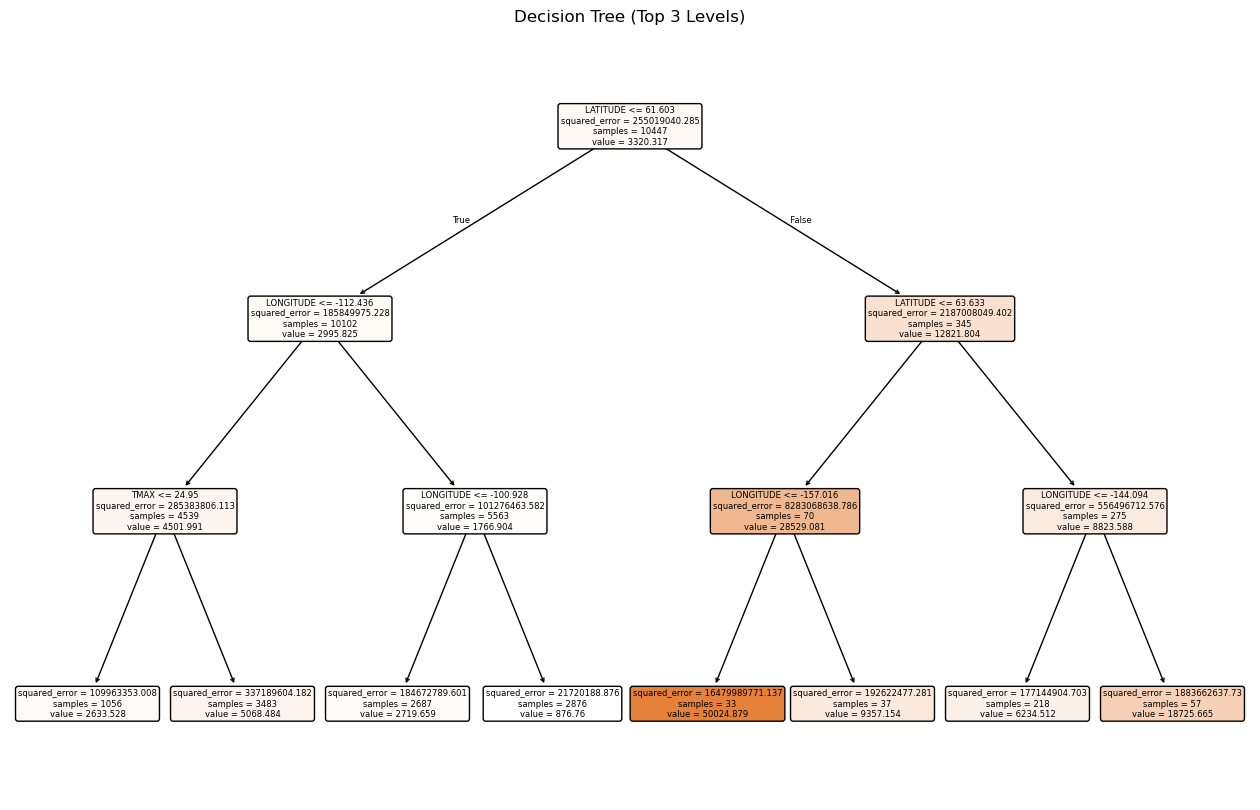

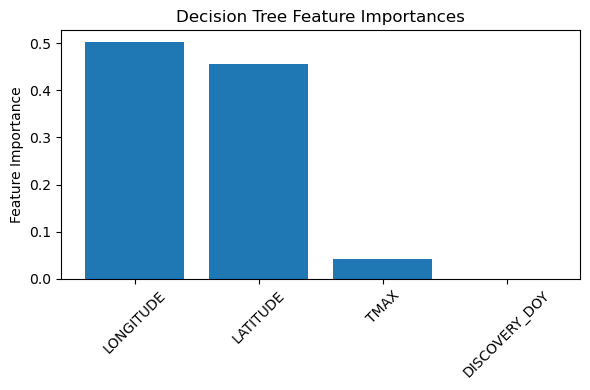

In [55]:
# Plot top levels of the best decision tree (full tree might be huge)
plt.figure(figsize=(16, 10))
plot_tree(
    best_tree,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=3  # show only first 3 levels for readability
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

# Feature importances
tree_importances = best_tree.feature_importances_
sorted_idx = np.argsort(tree_importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(len(feature_cols)), tree_importances[sorted_idx])
plt.xticks(range(len(feature_cols)),
           np.array(feature_cols)[sorted_idx],
           rotation=45)
plt.ylabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()

## Random Forest

In [56]:
rf = RandomForestRegressor(
    random_state=0,
    n_jobs=-1
)

rf_param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [1, 2, 4],  # number of features to consider at each split
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=logo,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

rf_grid.fit(X_train, y_train, groups=groups)

best_rf = rf_grid.best_estimator_
best_rf_params = rf_grid.best_params_
best_rf_rmse_cv = (-rf_grid.best_score_) ** 0.5

print("\n=== Random Forest (GridSearchCV) ===")
print("Best params:", best_rf_params)
print(f"Best CV RMSE (LOGO): {best_rf_rmse_cv:,.2f}")

rf_results = evaluate_regression(
    best_rf, X_train, y_train, X_test, y_test,
    model_name="Random Forest"
)


Fitting 6 folds for each of 54 candidates, totalling 324 fits

=== Random Forest (GridSearchCV) ===
Best params: {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 10, 'n_estimators': 500}
Best CV RMSE (LOGO): 15,607.03

=== Random Forest ===
Train RMSE: 14,819.02
Test  RMSE: 27,716.54
Test  MAE:  7,133.85
Train R^2: 0.139
Test  R^2: -0.003


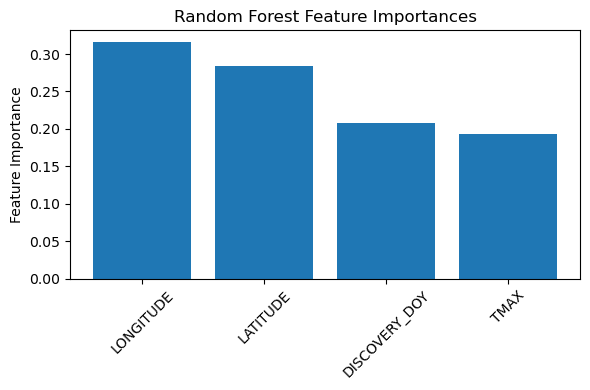

In [57]:
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(len(feature_cols)), rf_importances[sorted_idx])
plt.xticks(range(len(feature_cols)),
           np.array(feature_cols)[sorted_idx],
           rotation=45)
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

## Gradient Boosting

In [58]:
gbr = GradientBoostingRegressor(random_state=0)

gbr_param_grid = {
    "n_estimators": [100, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "min_samples_leaf": [1, 5],
}

gbr_grid = GridSearchCV(
    estimator=gbr,
    param_grid=gbr_param_grid,
    cv=logo,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1,
)

gbr_grid.fit(X_train, y_train, groups=groups)

best_gbr = gbr_grid.best_estimator_
best_gbr_params = gbr_grid.best_params_
best_gbr_rmse_cv = (-gbr_grid.best_score_) ** 0.5

print("\n=== Gradient Boosting (GridSearchCV) ===")
print("Best params:", best_gbr_params)
print(f"Best CV RMSE (LOGO): {best_gbr_rmse_cv:,.2f}")

gbr_results = evaluate_regression(
    best_gbr, X_train, y_train, X_test, y_test,
    model_name="Gradient Boosting"
)

Fitting 6 folds for each of 16 candidates, totalling 96 fits

=== Gradient Boosting (GridSearchCV) ===
Best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100}
Best CV RMSE (LOGO): 16,998.40

=== Gradient Boosting ===
Train RMSE: 14,793.40
Test  RMSE: 27,992.02
Test  MAE:  7,193.23
Train R^2: 0.142
Test  R^2: -0.023


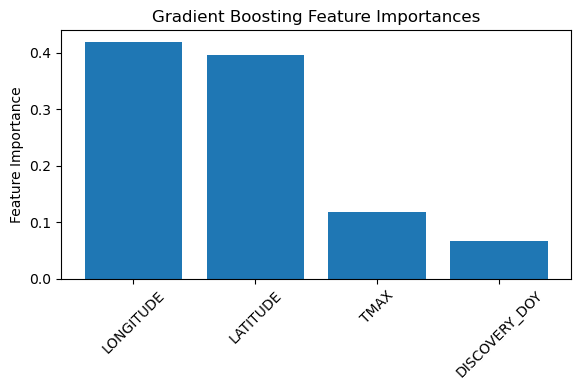

In [59]:
gbr_importances = best_gbr.feature_importances_
sorted_idx = np.argsort(gbr_importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(len(feature_cols)), gbr_importances[sorted_idx])
plt.xticks(range(len(feature_cols)),
           np.array(feature_cols)[sorted_idx],
           rotation=45)
plt.ylabel("Feature Importance")
plt.title("Gradient Boosting Feature Importances")
plt.tight_layout()
plt.show()

In [60]:
summary = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting"],
    "Train_RMSE": [tree_results["rmse_train"],
                   rf_results["rmse_train"],
                   gbr_results["rmse_train"]],
    "Test_RMSE": [tree_results["rmse_test"],
                  rf_results["rmse_test"],
                  gbr_results["rmse_test"]],
    "Test_MAE": [tree_results["mae_test"],
                 rf_results["mae_test"],
                 gbr_results["mae_test"]],
    "Train_R2": [tree_results["r2_train"],
                 rf_results["r2_train"],
                 gbr_results["r2_train"]],
    "Test_R2": [tree_results["r2_test"],
                rf_results["r2_test"],
                gbr_results["r2_test"]],
})

summary

,Model,Train_RMSE,Test_RMSE,Test_MAE,Train_R2,Test_R2
0,Decision Tree,15611.675081,28027.369525,7323.347979,0.044289,-0.025566
1,Random Forest,14819.021463,27716.539326,7133.845202,0.138875,-0.002945
2,Gradient Boosting,14793.402989,27992.019320,7193.232529,0.141849,-0.022981
